Ejercicios de grafos
Del .mat file de coactivation_matriz, realizar los siguientes ejercicios

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from IPython.core.pylabtools import figsize
from jedi.plugins.django import mapping

In [25]:
math_path = r"C:\Users\karim\OneDrive\Documentos\Python Scripts\Coactivation_matrix.mat"
contents = scipy.io.loadmat(math_path)
contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

1. Crear un dataframe con la información del ndarray de coactivation_matrix, las columnas deben ser números desde el 1, los índices deben ser iguales a las columnas

In [26]:
data = contents['Coactivation_matrix']
df = pd.DataFrame(data)
df.index = df.index + 1  
df.columns = df.columns + 1 
print(df)

          1         2         3         4         5        6         7    \
1    0.000000  0.160714  0.111486  0.000000  0.138095  0.00000  0.000000   
2    0.160714  0.000000  0.068259  0.000000  0.042056  0.00000  0.000000   
3    0.111486  0.068259  0.000000  0.224199  0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.224199  0.000000  0.000000  0.00000  0.039275   
5    0.138095  0.042056  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
634  0.053872  0.042105  0.161905  0.000000  0.000000  0.00000  0.000000   
635  0.049383  0.000000  0.103943  0.075697  0.000000  0.03876  0.000000   
636  0.000000  0.000000  0.034130  0.108787  0.000000  0.00000  0.105839   
637  0.050459  0.000000  0.000000  0.000000  0.103448  0.00000  0.000000   
638  0.101124  0.069231  0.000000  0.000000  0.053279  0.00000  0.000000   

          8    9         10   ...  629       630  631  632       633  \
1    0.000000  

2. Mostrar el heatmap de coativation_matrix 

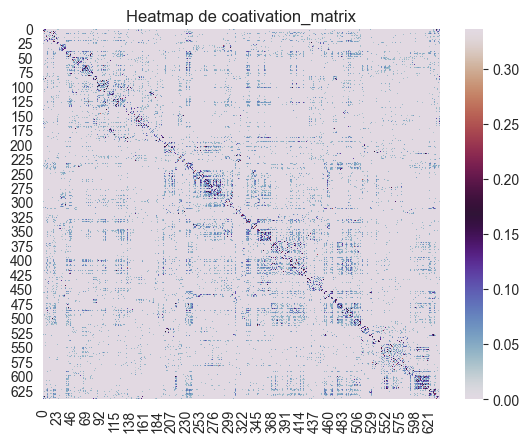

In [27]:
sns.heatmap(data, cmap='twilight')
plt.title("Heatmap de coativation_matrix")
plt.show()

3. Crear un dataframe subconjunto del dataframe anterior que contenga de la fila 10 a la 30 y de la columna 10 a la 30.

In [28]:
df = pd.DataFrame(data)
subset = df.iloc[9:30, 9:30] 
subset.index = range(10,31)
subset.columns = range(10,31)
print(subset)

          10        11        12        13        14        15        16  \
10  0.000000  0.054299  0.145251  0.000000  0.103286  0.000000  0.000000   
11  0.054299  0.000000  0.075000  0.035556  0.000000  0.000000  0.140940   
12  0.145251  0.075000  0.000000  0.000000  0.000000  0.053435  0.059701   
13  0.000000  0.035556  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.103286  0.000000  0.000000  0.000000  0.000000  0.043478  0.055215   
15  0.000000  0.000000  0.053435  0.000000  0.043478  0.000000  0.000000   
16  0.000000  0.140940  0.059701  0.000000  0.055215  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.036697  0.034398  0.000000  0.000000   
18  0.068627  0.107784  0.000000  0.033175  0.087209  0.034247  0.115108   
19  0.000000  0.046414  0.032864  0.170833  0.037344  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.000000

4. Mostrar el heatmap del nuevo dataframe

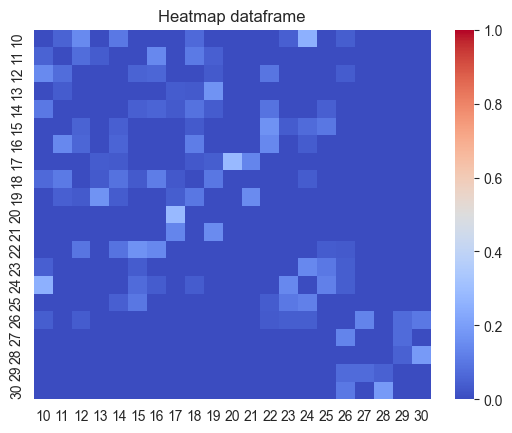

In [29]:
sns.heatmap(subset, vmin=0,vmax=1,cmap="coolwarm")
plt.title("Heatmap dataframe")
plt.show()

5. Crear el grafo dirigido del nuevo dataframe

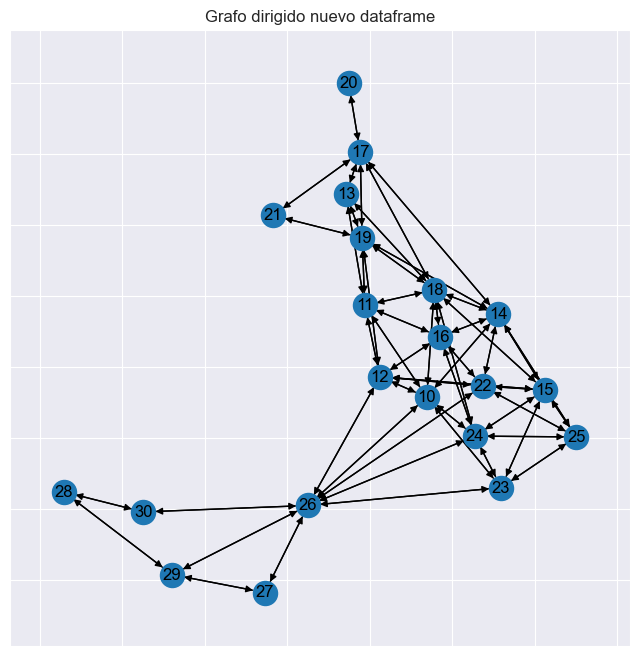

In [49]:
import networkx as nx
df_grafo = pd.DataFrame(subset)
G_grafo = nx.from_pandas_adjacency(df_grafo, create_using=nx.DiGraph())

plt.figure(figsize = (8,8))
pos = nx.spring_layout(G_grafo)
nx.draw_networkx(G_grafo, pos=pos, with_labels=True)

plt.title("Grafo dirigido nuevo dataframe")
plt.show()

6. ¿Qué nodo tiene más conexiones del nuevo dataframe?

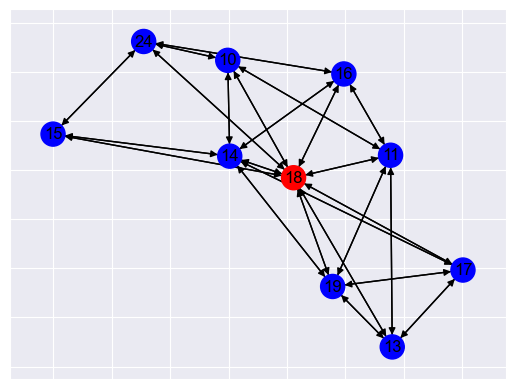

In [47]:
G = G_grafo.copy()
masconectado = max(G.degree, key=lambda x: x[1])[0]

grafo_nodo = G.subgraph([masconectado] + list(G.successors(masconectado)) + list(G.predecessors(masconectado)))

pos = nx.spring_layout(grafo_nodo)
color_nodo = ["red" if node == masconectado else "blue" for node in grafo_nodo]
nx.draw_networkx(grafo_nodo, pos=pos, with_labels=True, node_color=color_nodo)
plt.show()

7. Del dataframe con el array de coactivation_matrix, calcular los quantiles 0.25, 0.5, 0.75 de los valores de los datos (quantiles de las conexiones)

In [32]:
array = pd.DataFrame(data)
print(array.values)
# Cálculo de quantiles 
quantiles = array.quantile([0.25, 0.5, 0.75])
print(quantiles)

[[0.         0.16071429 0.11148649 ... 0.         0.05045872 0.1011236 ]
 [0.16071429 0.         0.06825939 ... 0.         0.         0.06923077]
 [0.11148649 0.06825939 0.         ... 0.03412969 0.         0.        ]
 ...
 [0.         0.         0.03412969 ... 0.         0.         0.        ]
 [0.05045872 0.         0.         ... 0.         0.         0.09777778]
 [0.1011236  0.06923077 0.         ... 0.         0.09777778 0.        ]]
      0    1    2    3    4    5    6    7    8    9    ...  628  629  630  \
0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      631  632  633  634  635  636  637  
0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 638 columns]


8. Mostrar el histograma de distribución de valores de la matriz de coativación

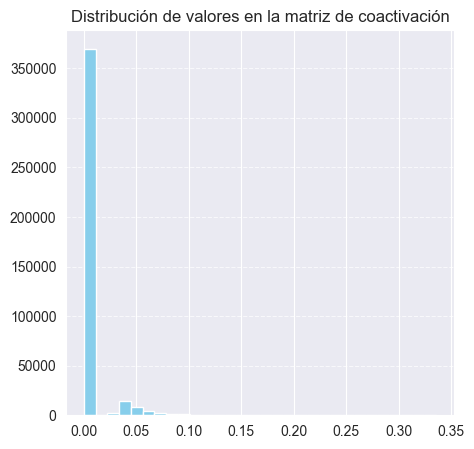

In [54]:
coactivation_matrix = contents["Coactivation_matrix"]
values = coactivation_matrix.flatten()

plt.figure(figsize=(5,5))
plt.hist(values, bins=30, color="skyblue")
plt.title("Distribución de valores en la matriz de coactivación")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


9. Filtre el nuevo dataframe usando como threshold el valor de 0, es decir, binarizar la matriz de coactivación con valores mayores a 0.

In [33]:
filtrado_df = array[(array > quantiles.loc[0.25]) & ( array < quantiles.loc[0.5])].dropna()
print(filtrado_df)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 638 columns]


Del archivo fve32.mat

In [34]:
math_path = r"C:\Users\karim\OneDrive\Documentos\Python Scripts\fve32.mat"
math_data = scipy.io.loadmat(math_path)
math_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])

1. Muestra el heatmap de la matriz de activación

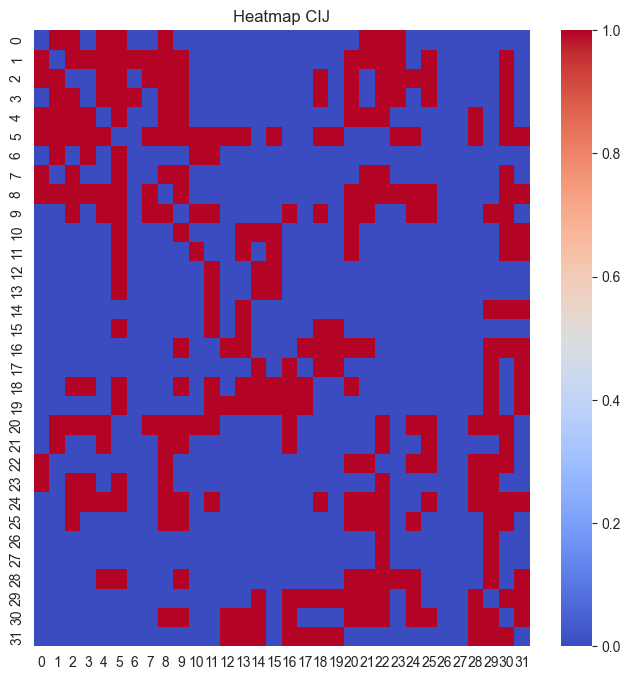

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

names = math_data["Names"]
cij_matrix = math_data["CIJ"]
names_type, names_shape = type(names), names.shape
cij_type, cij_shape = type(cij_matrix), cij_matrix.shape
names_list = [str(name[0]) for name in names]
plt.figure(figsize=(8,8))
sns.heatmap(cij_matrix,vmin=0,vmax=1,cmap="coolwarm")
plt.title("Heatmap CIJ")
plt.show()

2. Utilizando los nombres del archivo.mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)

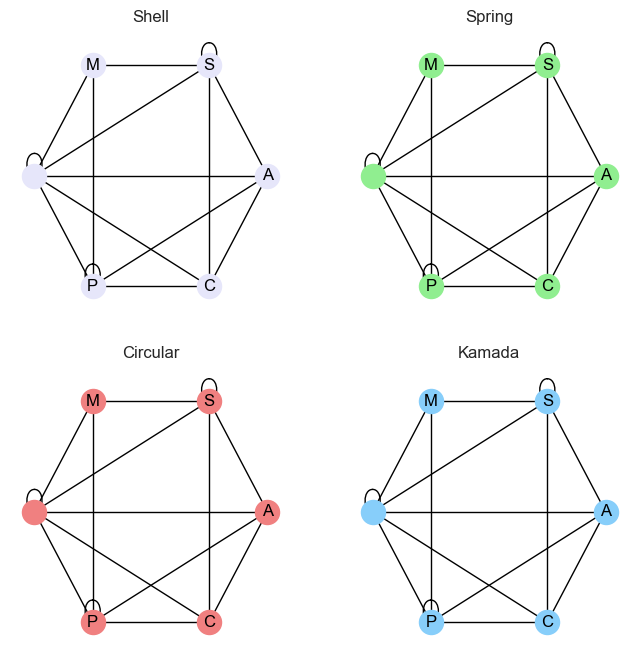

<Figure size 640x480 with 0 Axes>

In [36]:
import networkx as nx
G = nx.from_numpy_array(cij_matrix)
mapping = {i : names_list[i] for i in range(len(names_list))}
G = nx.relabel_nodes(G, mapping)
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
nx.draw_shell(G, with_labels=True, node_color="lavender")
plt.title("Shell")

plt.subplot(2,2,2)
nx.draw_shell(G, with_labels=True, node_color="lightgreen")
plt.title("Spring")

plt.subplot(2,2,3)
nx.draw_shell(G, with_labels=True, node_color="lightcoral")
plt.title("Circular")

plt.subplot(2,2,4)
nx.draw_shell(G, with_labels=True, node_color="lightskyblue")
plt.title("Kamada")

plt.show()
plt.tight_layout()

3. Determina el nodo con mayores conexiones

In [37]:
grados = np.sum(cij_matrix,axis=1)
max_index = np.argmax(grados)
max_node = names_list[max_index]
max_value = grados[max_index]

max_node, max_value

(' ', np.uint64(20))

4. Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

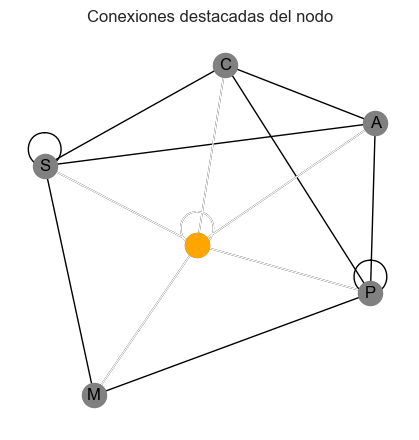

In [56]:
G = nx.from_numpy_array(cij_matrix)
mapping = {i : names_list [i] for i in range(len(names_list))}
G = nx.relabel_nodes(G, mapping)

connections = list(G.edges(max_node))
plt.figure(figsize=(4,4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="gray")

nx.draw_networkx_nodes(G, pos, nodelist=[max_node], node_color="orange")
nx.draw_networkx_edges(G, pos, edgelist = connections, edge_color="white")
plt.title(f"Conexiones destacadas del nodo")
plt.show()

1. Generar un número aleatorio entero en el rango [-3,3] con seed=5002

In [39]:
import random
random.seed(5002)
entero_aleatorio=random.randint(-3,3)
entero_aleatorio

2

2. Generar un número aleatorio flotante en el rango [-10,10] con seed=5002

In [40]:
random.seed(5002)
flotante_aleatorio=random.uniform(-10,10)
flotante_aleatorio

2.756897507517177

3. Generar un array de 1000 números con distribución normal, con mu= ej1, y sigma=ej2

In [41]:
mu =entero_aleatorio
sigma = flotante_aleatorio
data = np.random.normal(mu, sigma, 1000)
data

array([ 3.85848176e+00, -1.33612565e+00, -2.37386388e+00,  5.70813539e-01,
       -7.18474312e-01, -3.09576833e+00, -3.00938547e-02,  5.41656463e+00,
        3.82711136e+00,  6.12196730e+00, -5.02415179e-01,  3.21327483e+00,
        2.02377691e+00,  3.42686673e-01, -8.16313330e-01,  3.71935326e+00,
        1.59070803e+00,  2.99626134e+00,  2.49740582e+00,  6.75968181e+00,
        3.94456439e+00,  5.92942076e+00,  3.54517202e+00,  2.01029676e+00,
        1.58270360e+00,  9.63533489e+00, -3.70477308e+00,  2.50623726e+00,
        5.16852003e+00,  8.75982674e-01,  1.14216877e+00, -2.24761836e+00,
        1.78977843e+00,  1.41797762e+00,  3.21089645e+00,  1.73455402e-01,
        2.68646072e-01,  1.43669032e-01, -1.79648813e+00,  4.67447020e+00,
        5.17757601e+00,  4.35961640e+00,  3.35252453e+00,  2.90089386e+00,
       -5.36223916e-01,  3.46480484e-01,  4.05683989e+00,  6.39236714e-02,
       -4.20673205e+00, -1.25838974e+00,  7.26250326e-01,  2.45769334e+00,
       -1.12928254e+00,  

4. Plotear la distribución de los 1000 números

[ 5.41612898e+00  4.06829290e-01  6.05715754e+00  5.18671603e+00
 -3.25445207e+00 -1.67114714e+00  2.33541731e+00  5.22496282e+00
  4.27098448e-01  4.07968447e+00  2.44813337e+00  2.62207867e+00
 -6.95619533e-01  1.55298660e+00 -6.47405752e-01  7.66837350e+00
 -1.69121309e+00  2.76058609e+00 -2.98742132e-01  1.67019652e+00
  9.32104119e-01 -2.89599459e+00  9.71127077e-01  3.03590737e+00
  6.52075579e+00 -5.05563079e-01  3.14021418e+00 -3.10881371e-02
  2.34236867e+00  1.66777643e+00 -1.43853653e+00  4.07198140e+00
  4.32018930e+00  4.90167934e+00  3.42926519e+00  5.00355313e+00
  3.79225337e+00  1.73065426e+00  4.68008448e+00  2.78137245e+00
 -4.02958446e+00 -1.01547744e-01  4.77139610e+00 -1.35749286e+00
 -1.95560686e+00  6.42886476e+00  2.95669070e+00 -1.49890983e+00
 -5.62310408e-01 -2.14728494e+00 -1.38446456e+00  1.83484518e-01
  2.41563733e+00  3.93561418e+00 -3.91932669e-01  4.13427749e+00
  4.03995954e+00 -2.83460250e+00 -1.98924764e+00  2.97574679e+00
 -1.83625430e+00 -2.84157

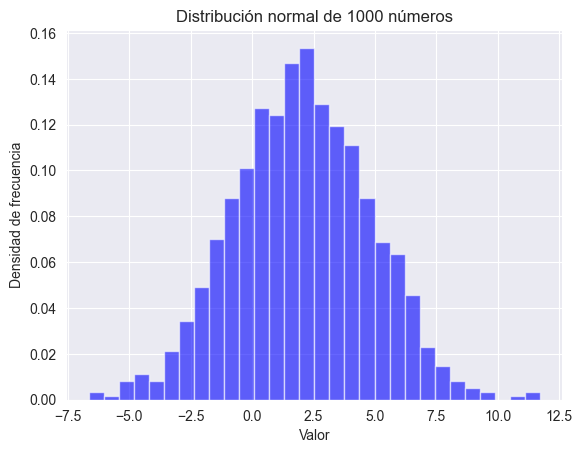

In [42]:
mu = entero_aleatorio 
sigma = flotante_aleatorio

data = np.random.normal(mu, sigma, 1000)

print(data)
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue')
plt.title("Distribución normal de 1000 números")
plt.xlabel("Valor")
plt.ylabel("Densidad de frecuencia")
plt.show()

5. Calcular el valor de 1sigma, 2sigma, 3sigma

In [43]:
mu=entero_aleatorio
sigma=flotante_aleatorio
rango_1sigma = (mu - sigma, mu + sigma)
rango_2sigma = (mu - 2 * sigma, mu + 2 * sigma)
rango_3sigma = (mu - 3 * sigma, mu + 3 * sigma)
print("Valor de mu (media):", mu)
print("Valor de sigma (desviación estándar):", sigma)
print("Rango de 1σ:", rango_1sigma)
print("Rango de 2σ:", rango_2sigma)
print("Rango de 3σ:", rango_3sigma)

Valor de mu (media): 2
Valor de sigma (desviación estándar): 2.756897507517177
Rango de 1σ: (-0.7568975075171771, 4.756897507517177)
Rango de 2σ: (-3.513795015034354, 7.513795015034354)
Rango de 3σ: (-6.270692522551531, 10.270692522551531)


6. Calcular el porcentaje de números que están en el rango [-1sigma, 1sigma]

In [44]:
en_1sigma = np.sum((data >= rango_1sigma[0]) & (data <= rango_1sigma[1])) / len(data) * 100
print("Porcentaje de números en el rango de 1σ:", en_1sigma, "%")

Porcentaje de números en el rango de 1σ: 67.5 %


7. Calcular el porcentaje de número que están en el rango [-2sigma, 2sigma]

In [45]:
en_2sigma = np.sum((data >= rango_2sigma[0]) & (data <= rango_2sigma[1])) / len(data) * 100
print("Porcentaje de números en el rango de 2σ:", en_2sigma, "%")

Porcentaje de números en el rango de 2σ: 95.7 %


8. Calcular el porcentaje de número que están en el rango [-3sigma, 3sigma]

In [46]:
en_3sigma = np.sum((data >= rango_3sigma[0]) & (data <= rango_3sigma[1])) / len(data) * 100
print("Porcentaje de números en el rango de 3σ:", en_3sigma, "%")

Porcentaje de números en el rango de 3σ: 99.6 %


9. Crear una función que reciba un entero (mu), un flotante(sigma) y un entero (total de números) y: genere array de números con distribución normal, con mu, y sigma. Plotee la distribución, calcule los sigmas, calcule el porcentaje de números que están en los rangos de +-sigma,+-2sigma,+-3sigma

Media (μ): 2.00
Desviación Estándar (σ): 2.76


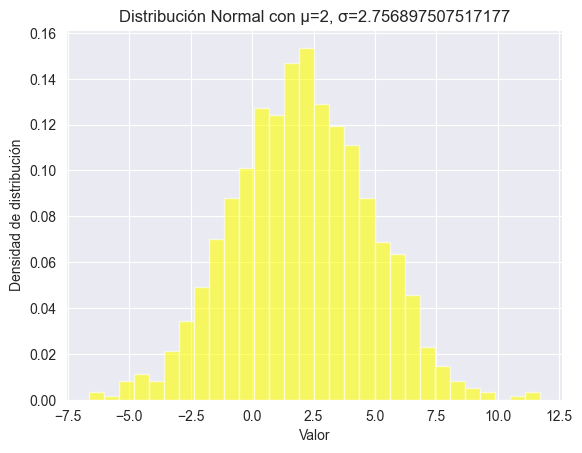

Array de numeros
0.3561200217762719


In [62]:
total_numeros = rango_1sigma, rango_2sigma, rango_3sigma
def distribucion_normal(mu, sigma, total_numeros):
    data = np.random.normal(mu, sigma)

    print("Array de numeros")
    print(data)
    
plt.hist(data, bins=30, density=True, alpha=0.6, color='yellow')
plt.title(f'Distribución Normal con μ={mu}, σ={sigma}')
plt.xlabel('Valor')
plt.ylabel('Densidad de distribución')
plt.grid(True)

sigma1 = np.sum((data >= (mu - sigma)) & (data <= (mu + sigma))) / total_numeros * 100
sigma2 = np.sum((data >= (mu - 2 * sigma)) & (data <= (mu + 2 * sigma))) / total_numeros * 100
sigma3 = np.sum((data >= (mu - 3 * sigma)) & (data <= (mu + 3 * sigma))) / total_numeros * 100

print(f'Media (μ): {mu:.2f}')
print(f'Desviación Estándar (σ): {sigma:.2f}')
plt.show()

distribucion_normal(mu=2, sigma=1.8, total_numeros=1000)

10. Usar la función anterior con los valores (0,1,1000),(3,5,5000),(-3,3,10000)

In [63]:
distribucion_normal(mu=0, sigma=1, total_numeros=1000)
distribucion_normal(mu=3, sigma=5, total_numeros=5000)
distribucion_normal(mu=-3, sigma=3, total_numeros=10000)

Array de numeros
-0.4339433109194749
Array de numeros
13.615210685300312
Array de numeros
-2.83493152211563
